## Binary Classification by Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets\insurance.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


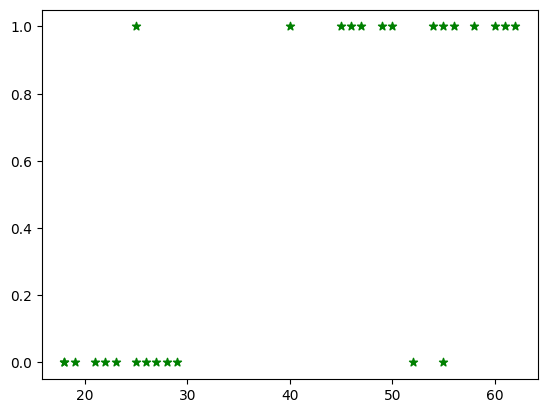

In [3]:
plt.scatter(x= df.age, y = df.bought_insurance, marker='*',color='green')

In [4]:
df.shape

(27, 2)

In [5]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(df[['age']], df.bought_insurance, test_size=.1, random_state=1)

In [6]:
X_train.head()

,age
3,52
23,45
10,18
20,21
21,26


In [7]:
X_test.head()

,age
17,58
14,49
18,19


In [8]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()

In [9]:
model_1.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = model_1.predict(X_test)

In [11]:
model_1.score(X_test,y_test)

1.0

In [12]:
y_pred 

array([1, 1, 0], dtype=int64)

In [13]:
X_test

,age
17,58
14,49
18,19


In [14]:
model_1.coef_

array([[0.12628081]])

In [15]:
model_1.intercept_

array([-4.97348109])

In [16]:
model_1.predict_proba(X_test)

array([[0.08700173, 0.91299827],
       [0.22894487, 0.77105513],
       [0.92917899, 0.07082101]])

# Apply with Bigger Dataset

In [17]:
df = pd.read_csv('Datasets\HR_comma_sep.csv') #Importing the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
df.shape

(14999, 10)

In [19]:
df.columns # Checking the features the dataset has

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

###### The dataset has 14999 instances and 10 features where 'Left' is our Target feature.

In [20]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [22]:
df.isnull().sum() # Checking if our dataset contains any missing information

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [23]:
# Let's have a look who are lefting the company
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#### Some factors to Note from the above statistics:
- The less the satisfaction_level employees are likely to leave the company
- Imployees are not getting promotion could have an impact also for leaving the company
- Working on more projects, spending more time but not getting promoted could be the reason also leaving company


### Some visualization for better understanding

<Axes: xlabel='salary', ylabel='satisfaction_level'>

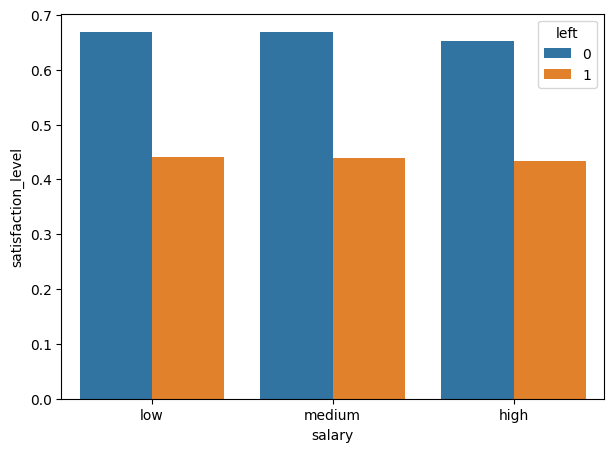

In [24]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='salary', y='satisfaction_level', hue='left', capsize=0.2, ci=None)

<Axes: xlabel='salary'>

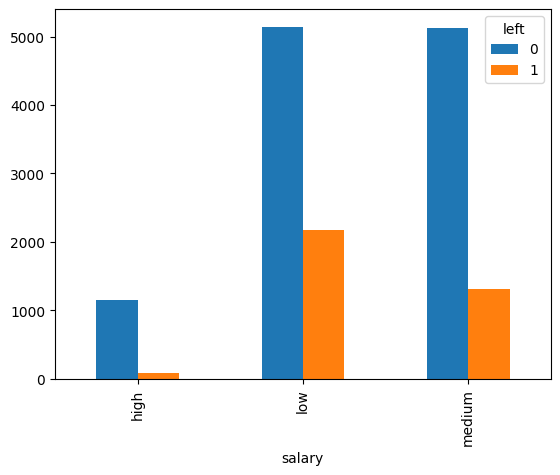

In [25]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

#### Department wise retention rate

<Axes: xlabel='Department'>

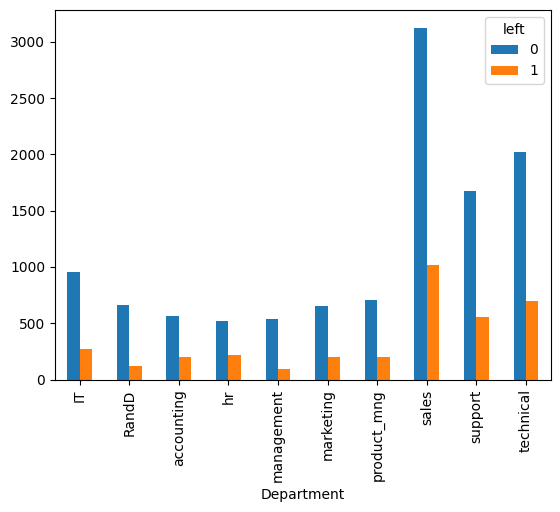

In [26]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

##### Which deparment is the happiest demartment?

<Axes: xlabel='Department', ylabel='satisfaction_level'>

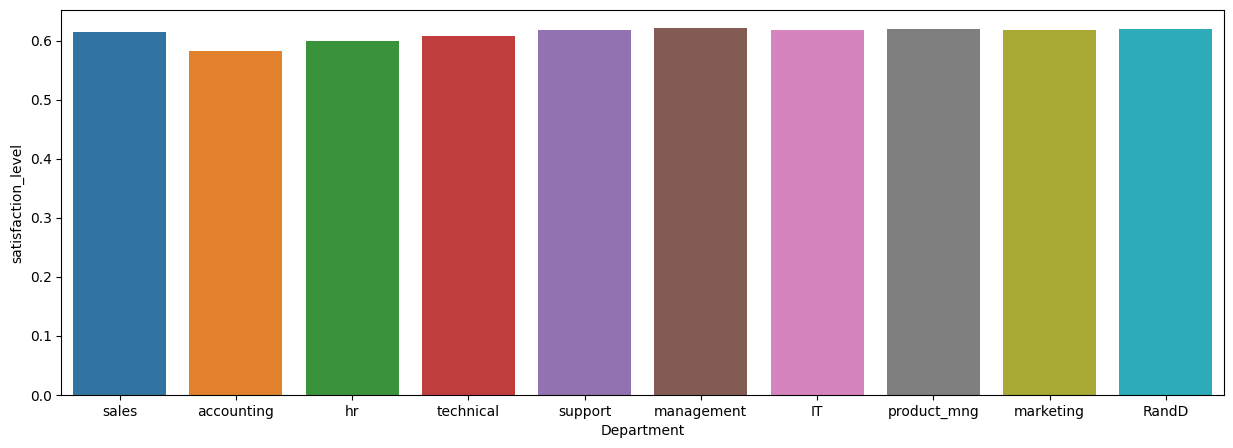

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='Department', y='satisfaction_level',  ci=None)

##### Promotion with respect to the number of projects

<Axes: xlabel='number_project'>

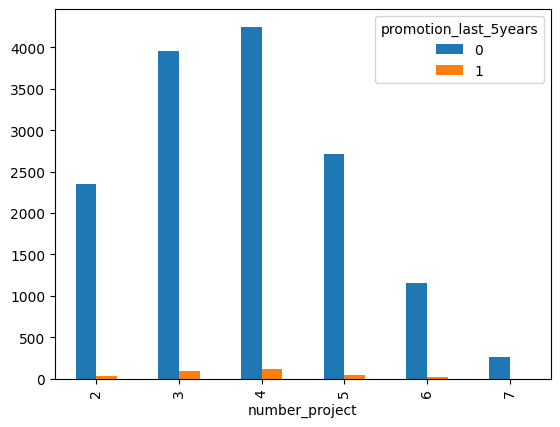

In [28]:
pd.crosstab(df.number_project,df.promotion_last_5years).plot(kind='bar')

##### Satisfaction level with respect to accident

<Axes: xlabel='Work_accident', ylabel='satisfaction_level'>

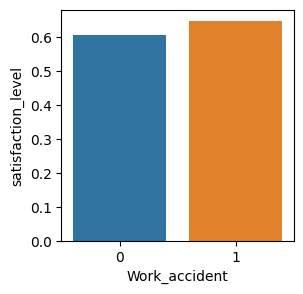

In [29]:
plt.figure(figsize=(3,3))
sns.barplot(data=df, x='Work_accident', y='satisfaction_level',  ci=None)

#### Checking the percetages of employeed left with respect to different categories of Salary

In [30]:
low_salary_left = df.salary[(df['salary'] == 'low') & (df['left'] == 1)].value_counts().values
medium_salary_left = df.salary[(df['salary'] == 'medium') & (df['left'] == 1)].value_counts().values
high_salary_left = df.salary[(df['salary'] == 'high') & (df['left'] == 1)].value_counts().values

In [31]:
Total_left = df.left[df['left']==1].value_counts().values # Total umber of people already left the company

In [32]:
low_salary_left, medium_salary_left

(array([2172], dtype=int64), array([1317], dtype=int64))

In [33]:
low_salary_left_percentage = np.round(low_salary_left[0]/Total_left*100, 2).tolist()
medium_salary_left_percentage = np.round(medium_salary_left[0]/Total_left*100, 2).tolist()
high_salary_left_percentage = np.round(high_salary_left[0]/Total_left*100, 2).tolist()


print("Percentage of Low Salary Employeed who left the company:", *low_salary_left_percentage, "%")
print("Percentage of Medium Salary Employeed who left the company:", *medium_salary_left_percentage, "%")
print("Percentage of High Salary Employeed who left the company:", *high_salary_left_percentage, "%")

Percentage of Low Salary Employeed who left the company: 60.82 %
Percentage of Medium Salary Employeed who left the company: 36.88 %
Percentage of High Salary Employeed who left the company: 2.3 %


##### So, we can clearly see that the low salary employeed have left the company most.

### Feature Selection

In [34]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
#Separating the Target Feature from the dataset
X = df.drop('left', axis = 1)
y = df[['left']]
y.head(2)

,left
0,1
1,1


In [36]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

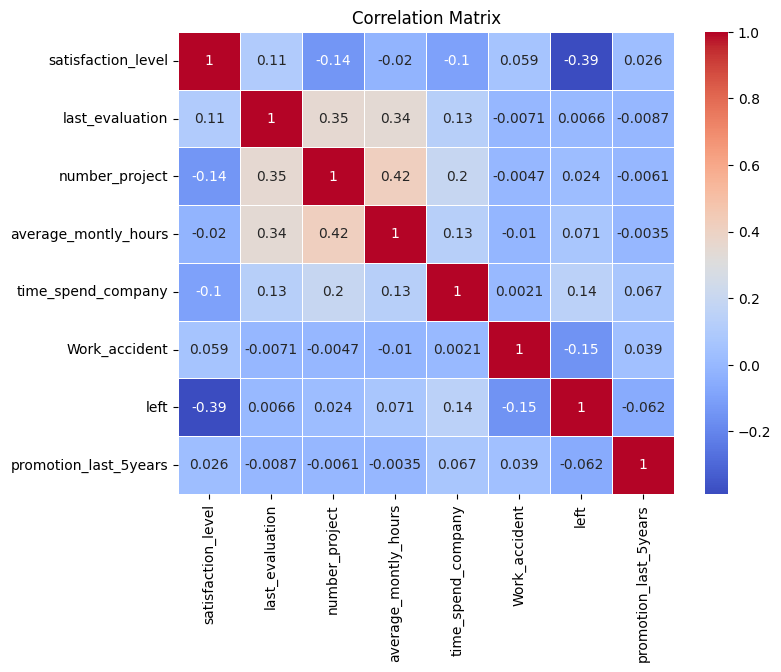

In [37]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [38]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [39]:
# By observing the correlation between the features we can choose the following features from the dataset

selected_features = ['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']
X = X[selected_features]
X.head(3)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium


### Encoding

In [40]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(X['salary'], prefix="salary")

In [41]:
# Concatenate the original DataFrame (X) with the one-hot encoded columns
X = pd.concat([X, one_hot_encoded], axis=1)
X.head(2)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1


In [42]:
#Drop the original Salary feature column which contains categorical values
X.drop('salary', axis =1 , inplace = True)

In [43]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


### Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Perform min-max scaling
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.31868132, 0.28504673, 0.        , 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.77570093, 0.        , 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.82242991, 0.        , 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.21962617, 0.        , 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.85981308, 0.        , 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.28971963, 0.        , 0.        , 1.        ,
        0.        ]])

In [45]:
col_names = X.columns
# Convert the array to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns = col_names)
X_scaled.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.318681,0.285047,0.0,0.0,1.0,0.0
1,0.780220,0.775701,0.0,0.0,0.0,1.0
2,0.021978,0.822430,0.0,0.0,0.0,1.0
3,0.692308,0.593458,0.0,0.0,1.0,0.0
4,0.307692,0.294393,0.0,0.0,1.0,0.0


### Split dataset for training and testing

In [46]:
XX_train, XX_test, yy_train, yy_test = tts (X_scaled, y, test_size = .25, random_state = 42)

In [47]:
yy_train.head(2)

,left
14480,1
1934,1


In [48]:
XX_train.head(2)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
14480,0.318681,0.200935,0.0,0.0,0.0,1.0
1934,0.758242,0.602804,0.0,0.0,0.0,1.0


In [49]:
model_2 = LogisticRegression()
model_2.fit(XX_train, yy_train)

LogisticRegression()

In [50]:
from sklearn.metrics import accuracy_score

# Predict the target variable for the test data
yy_pred = model_2.predict(XX_test)

#### Accuracy of the model

In [51]:
# Calculate the accuracy score
accuracy = accuracy_score(yy_test, yy_pred)

print("Accuracy:", accuracy*100, "%")

Accuracy: 76.32 %


### Let's try with Scaling the data with Standardscaler

In [52]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
S_X_scaler = s_scaler.fit_transform(X)

In [53]:
col_names = X.columns
# Convert the array to a DataFrame
S_X_scaler = pd.DataFrame(S_X_scaler, columns = col_names)
S_X_scaler.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,-0.936495,-0.882040,-0.147412,-0.299809,1.024775,-0.868132
1,0.752814,1.220423,-0.147412,-0.299809,-0.975824,1.151898
2,-2.022479,1.420657,-0.147412,-0.299809,-0.975824,1.151898
3,0.431041,0.439508,-0.147412,-0.299809,1.024775,-0.868132
4,-0.976716,-0.841993,-0.147412,-0.299809,1.024775,-0.868132


In [54]:
XX_train, XX_test, yy_train, yy_test = tts (S_X_scaler, y, test_size = .25, random_state = 42)

In [55]:
model_3 = LogisticRegression()
model_3.fit(XX_train, yy_train)

LogisticRegression()

In [56]:
from sklearn.metrics import accuracy_score

# Predict the target variable for the test data
yy_pred = model_3.predict(XX_test)

In [57]:
# Calculate the accuracy score
accuracy = accuracy_score(yy_test, yy_pred)

print("Accuracy:", round(accuracy*100,2), "%")

Accuracy: 76.27 %


### Extra: Ridge Regression
**Note:** It is a regression algorithm used for solving regression problems, specifically for linear regression tasks.

Ridge Regression is an extension of linear regression that incorporates a regularization term to prevent overfitting. It is primarily used for continuous target variables, where the goal is to predict a numerical value. The algorithm estimates the relationship between the features (independent variables) and the target variable (dependent variable) by minimizing the sum of squared differences between the predicted and actual values, while also adding a penalty term to the loss function based on the magnitudes of the regression coefficients.

In [58]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')

In [59]:
ridge_reg.fit(XX_train, yy_train)

Ridge(alpha=1, solver='cholesky')

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
yy_pred = ridge_reg.predict(XX_test)


# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(yy_test, yy_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared value
r2 = r2_score(yy_test, yy_pred)
print("R-squared:", r2)

Mean Squared Error: 0.15228428900724886
R-squared: 0.16319662958608505
